<a href="https://colab.research.google.com/github/jovanneconde/simulacion-II/blob/main/inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

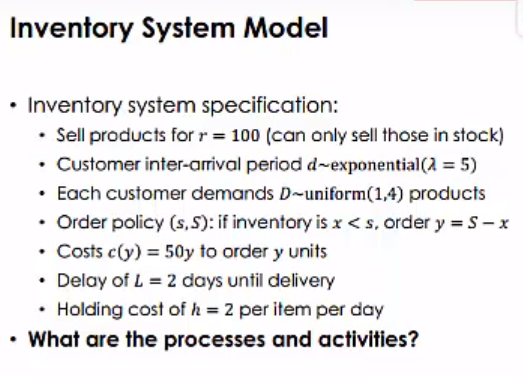

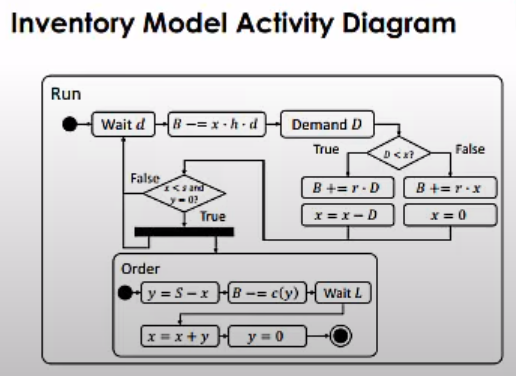

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0.11 sold 2
0.65 sold 4
0.77 sold 1
0.84 sold 2
0.89 sold 2
0.91 sold 4
0.98 sold 1
1.32 sold 4
1.35 sold 1
1.35 place order for 21
1.52 sold 4
1.83 sold 3
1.99 sold 1
2.36 sold 0 (out of stock)
3.06 sold 0 (out of stock)
3.08 sold 0 (out of stock)
3.10 sold 0 (out of stock)
3.13 sold 0 (out of stock)
3.29 sold 0 (out of stock)
3.32 sold 0 (out of stock)
3.35 received order, 21 in inventory 
3.49 sold 4
3.62 sold 3
3.74 sold 4
3.87 sold 1
3.87 place order for 21
4.09 sold 3
4.41 sold 2
4.43 sold 2
4.67 sold 0 (out of stock)
4.82 sold 0 (out of stock)


Text(0, 0.5, 'Inventory level')

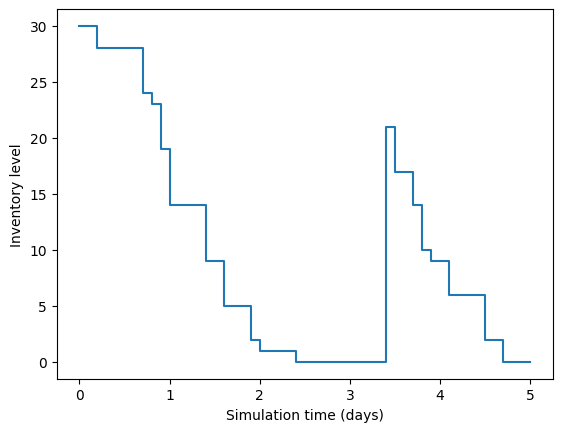

In [3]:
"""
Created on Mon Jun 19 22:49:35 2023

@author: John
"""
!pip install simpy
import simpy
import numpy as np

def warehouse_run(env, order_cutoff ,order_target):
  global inventory, balance, num_ordered

  inventory = order_target
  balance = 0.0
  num_ordered = 0

  while True:
    interarrival = generate_interarrival()
    yield env.timeout(interarrival)
    balance -= inventory*2*interarrival
    demand = generate_demand()
    if demand < inventory:
      balance += 100 * demand
      inventory -= demand
      print ('{:.2f} sold {}'.format(env.now, demand))
    else:
      balance += 100 * inventory
      inventory = 0
      print ('{:.2f} sold {} (out of stock)'.format(env.now, inventory))

    if inventory < order_cutoff and num_ordered == 0:
        env.process(handle_order(env, order_target))

def handle_order(env, order_target):
    global inventory, balance, num_ordered

    num_ordered = order_target - inventory
    print ('{:.2f} place order for {}'.format(env.now, num_ordered))
    balance-= 50* num_ordered
    yield env.timeout(2.0)
    inventory += num_ordered
    num_ordered= 0
    print ('{:.2f} received order, {} in inventory '.format(env.now, inventory))


def generate_interarrival():
  return np.random.exponential(1./5)

def generate_demand():
  return np.random.randint(1,5)

obs_time = []
inventory_level = []

def observe(env):
    global inventory

    while True :
        obs_time.append(env.now)
        inventory_level.append(inventory)
        yield env.timeout(0.1)

np.random.seed(2)

env=simpy.Environment()
env.process(warehouse_run(env,10,30))
env.process(observe(env))

env.run(until=5.0)

import matplotlib.pyplot as plt

plt.figure()
plt.step(obs_time, inventory_level, where ='post')
plt.xlabel('Simulation time (days)')
plt.ylabel('Inventory level')
